In [9]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(5,5)
np.set_printoptions(precision=2)
pd.set_option("display.precision", 4)

# Introducción

El término **descenso del gradiente** agrupa un conjunto de métodos de optimización numérica.

En este curso vamos a cuaderno aprenderemos el algoritmo básico.<BR>
Sobre él se han ido incorporando mejoras para resolver los problmeas que aparecen cuando se recurre a métodos numéricos.

El descenso del gradiente se utiliza todos los días miles de veces por todos los sistemas de ML a lo largo del mundo.

# Elementos matemáticos necesarios

- ¿Qué es un gradiente?
- ¿Bajo que condiciones puedo calcularlo?

## ¿Qué es un gradiente?

Es un vector que marca la dirección de máxima pendiente de una función en un punto dado.

Sea $~\mathcal L({\bf w}):\mathbb R^D \rightarrow \mathbb R,~$
entonces el gradiente de $\mathcal L$ respecto de $\bf w$ es el vector:
$$
\nabla_w \mathcal L = \left[
  \frac{\partial \mathcal L}{\partial w_1},~
  \frac{\partial \mathcal L}{\partial w_2},~
  \cdots,~
  \frac{\partial \mathcal L}{\partial w_D}
\right]
$$

Esa es la definición, pero **¿qué significa?**
- $\mathcal L({\bf w})$ es, en general, una superficie en un espacio $(D+1)$-dimensional.
>  _Ejemplo con D=2_.<br>
   $\quad \mathcal L(w_1,w_2) = w_1^2 + w_2^2~$ genera una parábola en 3D al dar valores a $~x_1~$ y $~x_2.~$
- Según "viajamos" por $\mathbb R^D$ vamos obteniendo valores de $\mathcal L({\bf w})$. <br>
A veces subimos, a veces bajamos, a veces incluso ni una cosa ni otra.
- El gradiente en un punto concreto $\bf w$ nos indica la dirección en la que hay que moverse para lograr subir más rápido que en ninguna otra dirección.
> _Siguiendo con el ejemplo de la parábola_, el gradiente es
$$
\nabla_{\bf w}\mathcal L =
\left[
  \begin{array}{l}
    \frac{\partial \mathcal L}{\partial w_1} = 2w_1 \\
    \frac{\partial \mathcal L}{\partial w_2} = 2w_2 \\
  \end{array}
\right]
$$
Vamos a verlo con código.<br><br>
En primer lugar creamos las funciones $~\mathcal L({\bf w})~$ y $\nabla_{\bf w}\mathcal L.~$<br>
Despues "viajamos" por el espacio 2D de los puntos $\bf w$ y vamos obteniendo tanto el valor de $~\mathcal L({\bf w})~$ como de $\nabla_{\bf w}\mathcal L~$ para cada punto.

In [10]:
# Definir la función de la parábola
def fun_L(x, y):
    return x**2 + y**2

# Definir la función del gradiente
def fun_grad_L(x, y):
    return np.array([2*x, 2*y])

# Hacer un barrido del espacio 2D
bound = 4 #<- límites del intervalo en un eje = [-bound, bound]
Ns = 12   #<- cuantas muestras tomo en ese intervalo

w1 = np.linspace(-bound, bound, Ns)
w2 = np.linspace(-bound, bound, Ns)
ww1,ww2 = np.meshgrid(w1,w1)

# calculo de L y gradiente de L
L = fun_L(ww1,ww2)
grad_L = fun_grad_L(ww1,ww2)

>Ya solo queda pintarlo.<br>
El código dibuja la parábola 3D que resulta de viajar por el espacio 2D de $\bf w$ evaluando $\mathcal L$.<br>
Además proyecta algunas curvas de nivel en el plano de $\bf w$ y pinta las flechas del gradiente $\nabla_{\bf w}\mathcal L.~$

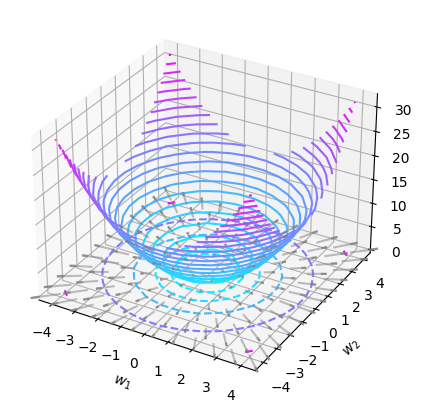

In [11]:
# Dibuja la parabola mediante 25 curvas de nivel
ax = plt.axes(projection='3d')
ax.contour3D(ww1, ww2, L, 25, cmap='cool')

# Proyecta algunas curvas de nivel en el espacio 2D de w=[w1,w2]
ax.contour(ww1, ww2, L, levels=[0,2,4,8,16,30], linestyles='--',
            zdir='z', offset=0, cmap='cool')

# Crear un gráfico de vectores para el gradiente
ax.quiver3D(ww1, ww2, np.zeros_like(ww1),
            grad_L[0,:,:], grad_L[1,:,:], np.zeros_like(ww1),
            length=0.1, arrow_length_ratio=0.3, normalize=False,
            colors='gray', alpha=0.5)

# Agregar etiquetas y mostrar
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.axis('tight')
plt.show()


Para terminar vamos a elegir un punto $\bf w$ y movernos en la dirección marcada por el gradiente en ese punto.
En otras palabras, obtendremos un nuevo punto tal que, al evaluarlo, habrá logrado la mayor subida respecto a otras direcciones.
$$
{\bf w}^\text{nuevo} = {\bf w} + \nabla_{\bf w}{\mathcal L(\bf w)}
$$



In [12]:
w_sel = np.array([1,1])  #<-- elegir un punto
L_w = fun_L(w_sel[0], w_sel[1])
g_dir = fun_grad_L(w_sel[0], w_sel[1])

print(f'- punto seleccionado, w_sel = {w_sel}')
print(f'- L(w_sel) = {L_w}')
print(f'- dirección de máximo crecimiento = {g_dir}')
print(f'- nuevo punto siguiendo esa dirección = w_sel + dirección = {w_sel + g_dir}')

- punto seleccionado, w_sel = [1 1]
- L(w_sel) = 2
- dirección de máximo crecimiento = [2 2]
- nuevo punto siguiendo esa dirección = w_sel + dirección = [3 3]


## ¿Qué requisitos debe haber para tener un gradiente?

La función $\mathcal L$ debe ser **derivable** en todas las direcciones.

## ¿Subir o bajar?

En el ejemplo, si seguimos el gradiente subimos y subimos sin parar. <br>
Pero de una parábola lo interesante es saber en qué punto se encuentra el mínimo $\rightarrow$ Siguiendo el gradiente NUNCA vamos a llegar a él.

Para encontrar el mínimo siguiendo el gradiente debemos **dar la vuelta a la función** ya que
$$
\mathop{\arg\min}\limits_{\bf w}  \big( \mathcal L({\bf w}) \big) =
\mathop{\arg\max}\limits_{\bf w}  \big( - \mathcal L({\bf w}) \big)
$$

# Algoritmo _Descenso de gradiente_


El _Descenso del gradiente_ es un algoritmo para localizar el mínimo de una función de manera itereativa.<br>

En cada iteración nos desplazamos por $\bf w$ en la dirección que marca el gradiente de $\mathcal L$. <br>
El algoritmo comienza en un punto aleatorio, y el desplazamiento produce un nuevo punto. Este proceso se repite, tomando como punto de partida el punto alcanzado en la iteración anterior, hasta que se cumple una condición de parada.

El pseudocódigo es:
```
[1]   w_now <- w_inicial
[2]   lr <- learning_rate
[3]   flag_stop  <- False
[4]   iter <- 0
[5]   while not flag_stop:
[6]       w_new <- update_rule(w_now, lr, gradient_L)
[7]       w_now <- w_new
[8]       flag_stop <- eval_stop(iter, w_now, fun_L)
```
**Regla de actualización** (_update rule_)
> El punto siguiente se calcula **descendiendo** por el gradiente, por tanto:
$$
{\bf w}^\text{nuevo} = {\bf w}^\text{actual} - \eta\cdot\nabla_{\bf w}{\mathcal L({\bf w}^\text{actual})}
$$
donde $\eta\in(0,1)$ es el ratio de aprendizaje.

**Ratio de aprendizaje** (_learning rate_)
> En vez de usar el valor del gradiente evaluado en el punto se utiliza sólo el $\eta \%$.<br>
Normalmente se empieza probando con $\eta=0.1$.

**Condición de parada** (_eval stop_)
> El algoritmo se detiene si ocurre alguno de los dos casos siguientes:
- El número iteraciones alcanza un tope
- El valor de $\mathcal L~$ ya no decrece más.  


# Ejemplo

El siguiente ejemplo implementa el descenso de gradiente grabando en listas la evolución del algoritmo. Además utiliza un número fijo de iteraciones.

In [13]:
# descenso de gradiente
Niter = 50
lr = 0.1
w_now = np.array([4,4])
list_w = [w_now]
list_gL = []
for _ in range(Niter):
  g_dir = fun_grad_L(w_now[0], w_now[1])
  w_new = w_now - lr*g_dir
  w_now = w_new
  list_gL.append(g_dir)
  list_w.append(w_new)

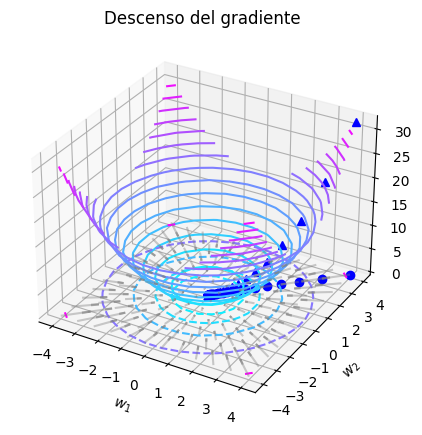

In [14]:
# Repetimos el dibujo anterior, pero cambiamos de sentido el gradiente
ax = plt.axes(projection='3d')
ax.contour3D(ww1, ww2, L, 20, cmap='cool')
ax.contour(ww1, ww2, L, levels=[0,2,4,8,16,30], linestyles='--',
            zdir='z', offset=0, cmap='cool')
ax.quiver3D(ww1, ww2, np.zeros_like(ww1),
            -grad_L[0,:,:], -grad_L[1,:,:], np.zeros_like(ww1),
            length=0.1, arrow_length_ratio=0.3, normalize=False,
            colors='gray', alpha=0.4)

# añadir la trayectoria seguida por el descenso de gradiente
ws = np.array(list_w)
plt.plot(ws[:,0], ws[:,1], fun_L(ws[:,0], ws[:,1]), 'b^', alpha=1)
plt.plot(ws[:,0], ws[:,1], np.zeros_like(ws[:,0]), 'bo', alpha=1)

# Agregar etiquetas y mostrar
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Descenso del gradiente')
plt.axis('tight')
plt.show()


# Ejercicios

Repite los ejemplos pero ahora utiliza la función
$\mathcal L(w_1, w_2) = w_1 e^{(w_1^2 + w_2^2)}$.<br>
Utiliza `bound = 2` y `Ns=32`

Modificar el último ejemplo para que el algoritmo del descenso del gradiente tenga una condición de parada doble:
- alcanzar un número máximo de iteraciones
- la diferencia entre el último punto alcanzado y media de los últimos $n$ últimos puntos de la trayectoria no supera un valor de tolerancia.

Modifica el algoritmo de descenso de gradiente para que empiece con $\eta = 0.0001$ y cada vez que descienda modifique $\eta$ multiplicándolo por 1.3.

Cuando la función evaluada en el último punto sea MAYOR que la función evaluada en el punto anterior debemos "resetear"  $~\eta = 0.0001.$

<small>(Este algoritmo se denomina _Denscenso de gradiente con ratio de aprendizaje variable_.)</small>